In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [39]:
data = pd.read_csv("../data/processed/combined.csv")
data.head()

,YYYYMMDD,HH,MWD,MWS,MWS10,WG,T,TD,SD,GR,P,NO2,O3
0,20160101,1,200,40,40,70,74,44,0,0,10212,36.53,20.24
1,20160101,2,200,40,30,70,65,44,0,0,10219,22.74,32.12
2,20160101,3,210,30,30,50,55,42,0,0,10225,24.28,29.87
3,20160101,4,210,30,30,40,55,46,0,0,10228,22.56,27.62
4,20160101,5,110,10,10,40,21,15,0,0,10233,23.67,25.62


Create additional column in dataset with date and hours

In [3]:
# creating new column where date and time are together
# so it would be possible to have values on x-axis
data['datetime'] = data['YYYYMMDD'].astype(str) + data['HH'].astype(str).str.zfill(2)

# O3 levels

### One week (Apr 18th - Apr 24th)

In [4]:
# Range of one week (Apr 18th - Apr 24th)
# Slicing doesn't include the last value, thus we make it on value bigger, so the last hour is also included in graph
one_week_data = data.iloc[2592:2760]   # [408:576] [1080:1248] [2424:2592] [2424:2592]  [2592:2760] 

# We need this to have names of the days instead of the date like YYYYMMDDHH
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x_ticks_labels = [days_of_week[i % 7] for i in range(len(one_week_data['datetime'][::24]))]

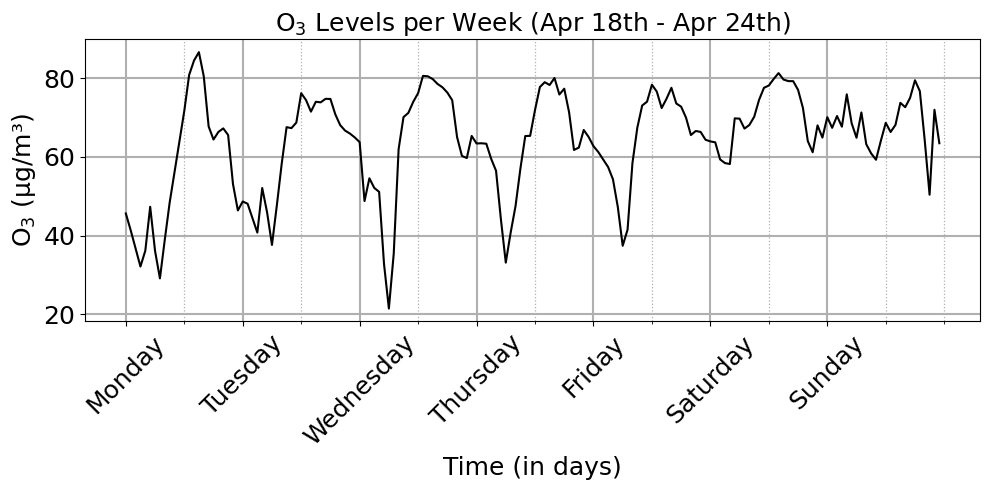

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(one_week_data['datetime'], one_week_data['O3'], linestyle='-', color='black')
plt.title('O$_3$ Levels per Week (Apr 18th - Apr 24th)', fontsize=18)
plt.xlabel('Time (in days)', fontsize=18)
plt.ylabel('O$_3$ (µg/m³)', fontsize=18)

# show the day of the week
plt.xticks(one_week_data['datetime'][::24], x_ticks_labels, rotation=45)

ax = plt.gca()

# Responsible for the grid
# adds one minor tick in the middle of each day
ax.xaxis.set_minor_locator(plt.MultipleLocator(12))
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.grid(which='minor', axis='x', linestyle=':', linewidth=0.9)
ax.grid(which='major', linestyle='-', linewidth=1.5)

ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()

### One year (2016)

In [9]:
# Selecting data for the whole year (8760 hours in a non-leap year + 1 hour since slicing doesn't include last value)
one_year_data = data.iloc[:8761] 

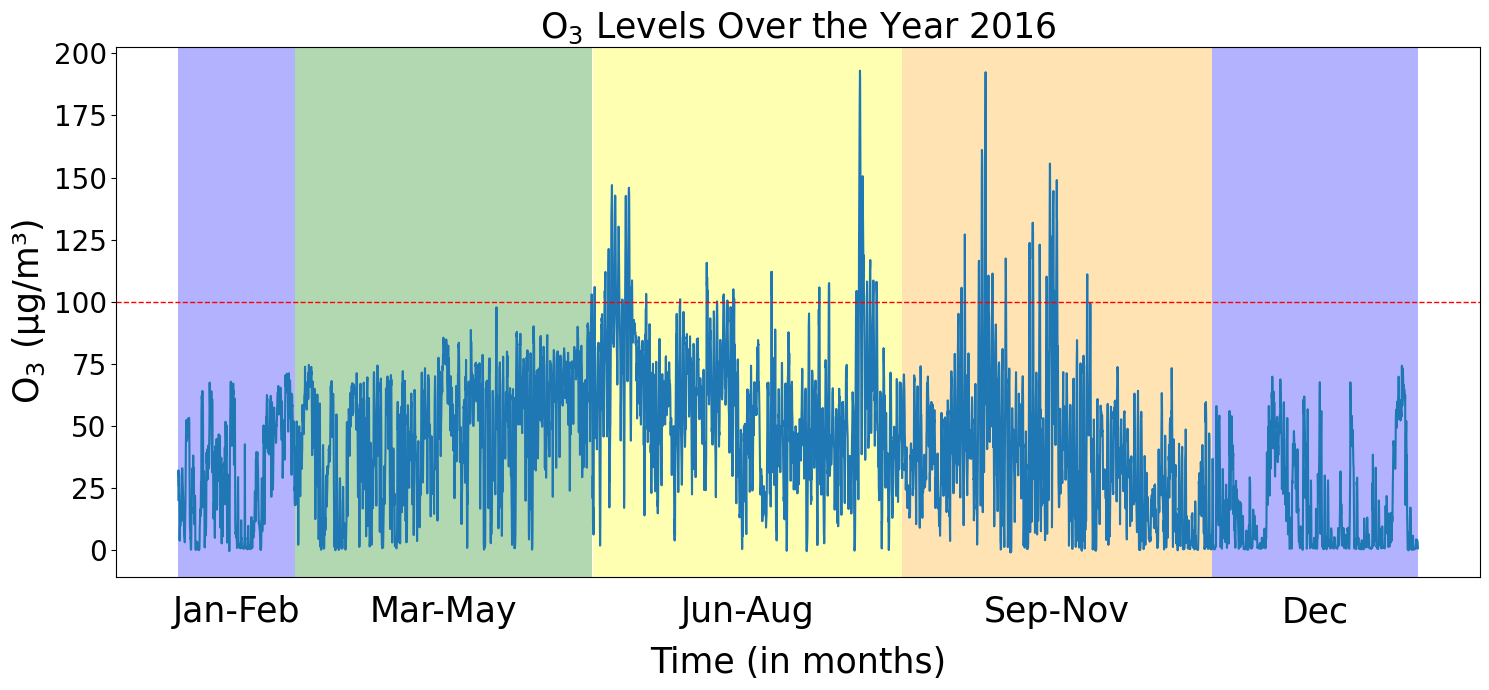

In [23]:
plt.figure(figsize=(15, 7)) 
plt.plot(one_year_data['datetime'], one_year_data['O3'], linestyle='-')
plt.title('O$_3$ Levels Over the Year 2016', fontsize=25)
plt.xlabel('Time (in months)', fontsize=25, labelpad=50)
plt.ylabel('O$_3$ (µg/m³)', fontsize=25)

# background colors for different year seasons (winter, spring, etc)
ax = plt.gca()

ax.axvspan(0, 826, facecolor='blue', alpha=0.3, label='Winter')  # winter
ax.axvspan(827, 2926, facecolor='green', alpha=0.3, label='Spring') # spring
ax.axvspan(2927, 5112, facecolor='yellow', alpha=0.3, label='Summer') # summer
ax.axvspan(5113, 7304, facecolor='orange', alpha=0.3, label='Autumn') # autumn
ax.axvspan(7305, 8761, facecolor='blue', alpha=0.3) # winter (December only)

# labels for all seasons
y_position = -max(one_year_data['O3']) * 0.15
plt.text(413, y_position, 'Jan-Feb', ha='center', fontsize=25)
plt.text(1876, y_position, 'Mar-May', ha='center', fontsize=25)
plt.text(4020, y_position, 'Jun-Aug', ha='center', fontsize=25)
plt.text(6208, y_position, 'Sep-Nov', ha='center', fontsize=25)
plt.text(8032, y_position, 'Dec', ha='center', fontsize=25)

plt.xticks([])  # no ticks on the x-axis

plt.axhline(y=100, color='red', linestyle='--', linewidth=1, label='Recommended level of O$_3$ (µg/m³)')

ax.grid(False)  # disables grid lines
ax.tick_params(axis='y', labelsize=20)

# plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.1), fontsize=22) 
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()


### Histogram with all possible values in one year (2016)

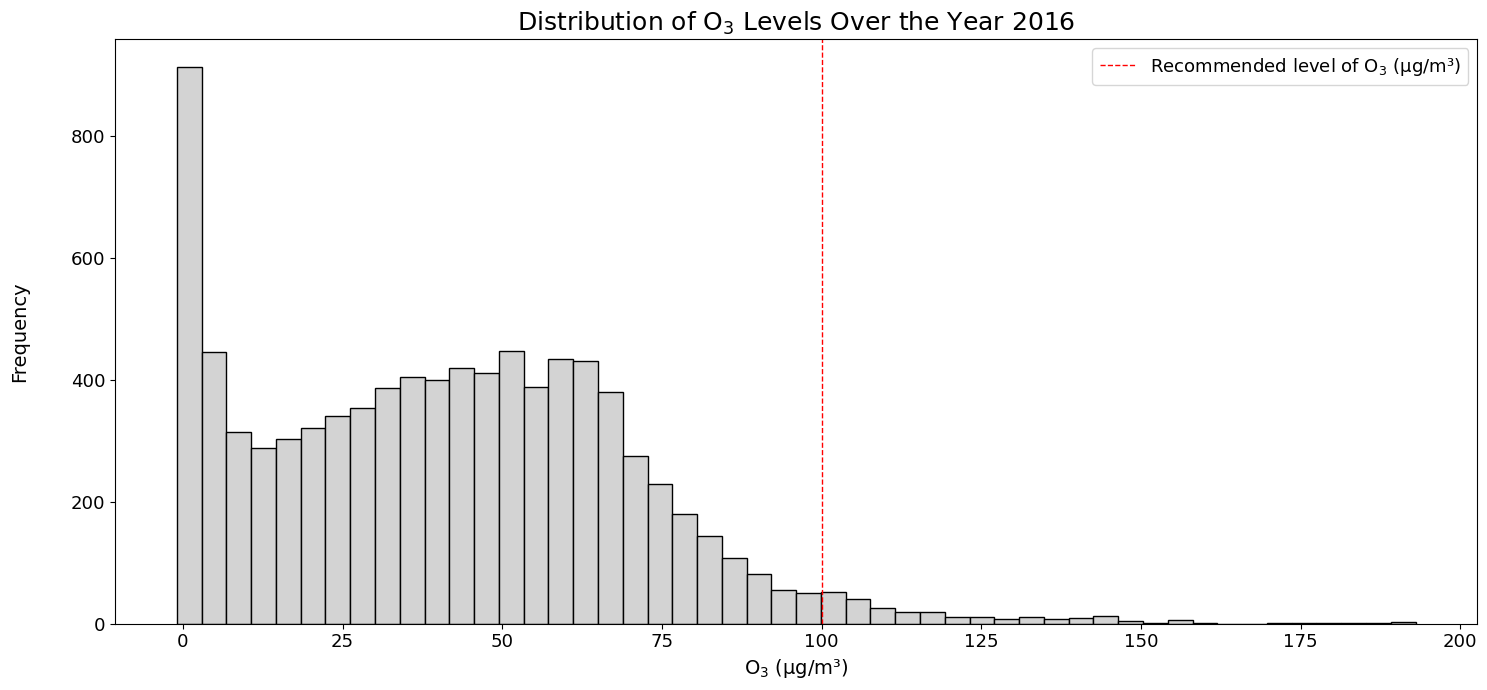

In [62]:
plt.figure(figsize=(15, 7))
plt.hist(one_year_data['O3'], bins=50, color='lightgray', edgecolor='black')
plt.title('Distribution of O$_3$ Levels Over the Year 2016', fontsize=18)
plt.xlabel('O$_3$ (µg/m³)', fontsize=14)
plt.ylabel('Frequency', fontsize=14, labelpad=30)

# threshold of recommended level of O3
plt.axvline(x=100, color='red', linestyle='--', linewidth=1, label='Recommended level of O$_3$ (µg/m³)')

ax = plt.gca()
ax.grid(False)  # removes grid lines
ax.tick_params(axis='both', which='major', labelsize=13)


plt.legend(loc='upper right', fontsize=13)
plt.tight_layout()
plt.show()

## NO2 levels

### One week (Apr 18th - Apr 24th)

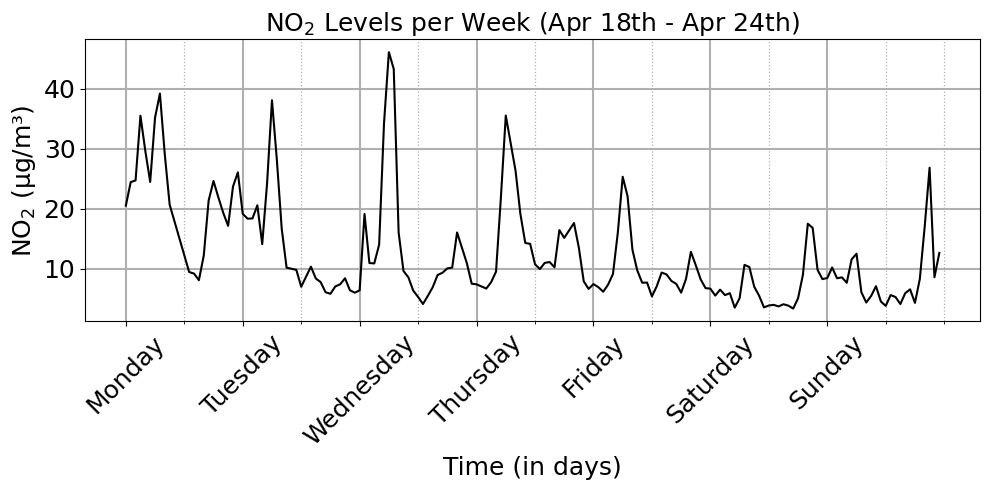

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(one_week_data['datetime'], one_week_data['NO2'], linestyle='-', color='black')
plt.title('NO$_2$ Levels per Week (Apr 18th - Apr 24th)', fontsize=18)
plt.xlabel('Time (in days)',  fontsize=18)
plt.ylabel('NO$_2$ (µg/m³)',  fontsize=18)

plt.xticks(one_week_data['datetime'][::24], x_ticks_labels, rotation=45)

ax = plt.gca()

# responsible for the grid
# adds one minor tick in the middle of each day
ax.xaxis.set_minor_locator(plt.MultipleLocator(12))  
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.grid(which='minor', axis='x', linestyle=':', linewidth=0.9)
ax.grid(which='major', linestyle='-', linewidth=1.5)

ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.show()

### One year (2016)

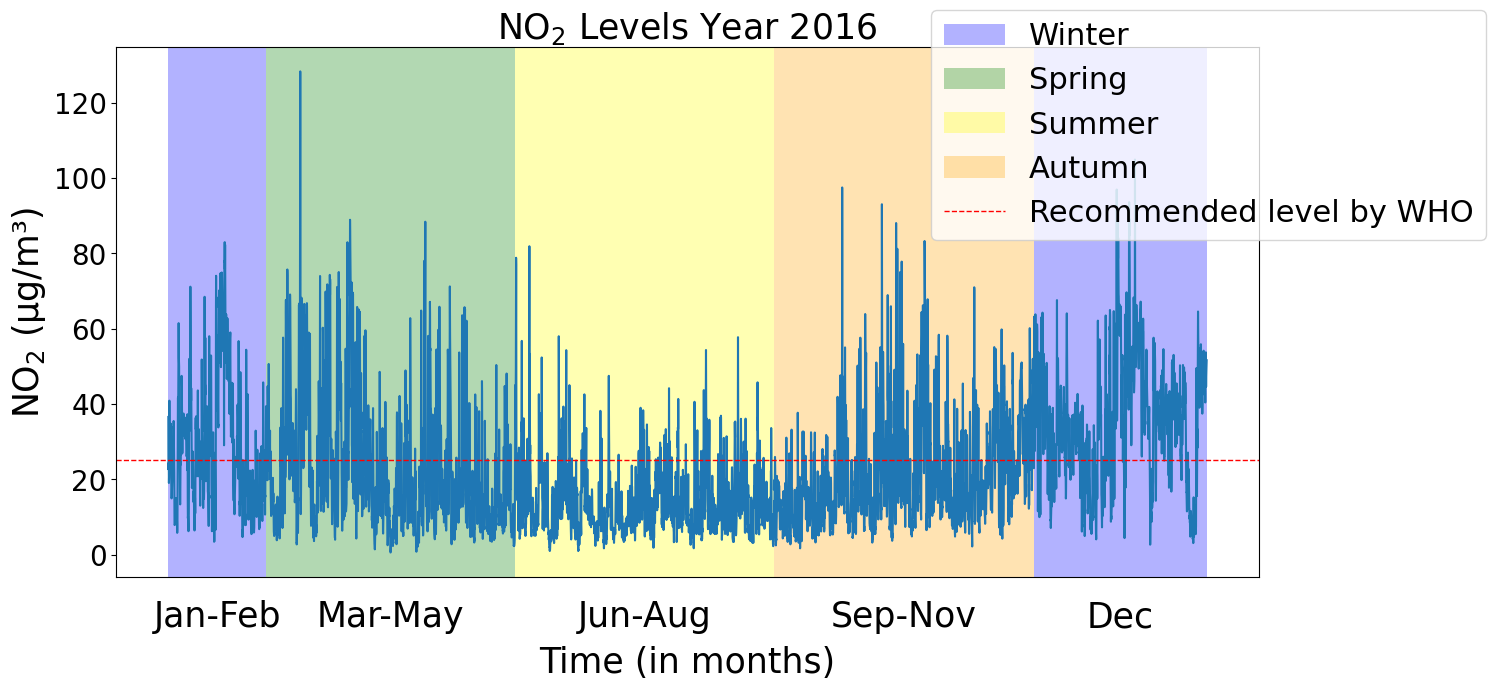

In [32]:

plt.figure(figsize=(15, 7))
plt.plot(one_year_data['datetime'], one_year_data['NO2'], linestyle='-')
plt.title('NO$_2$ Levels Year 2016', fontsize=25)
plt.xlabel('Time (in months)', fontsize=25, labelpad=50)
plt.ylabel('NO$_2$ (µg/m³)', fontsize=25)

# Add background colors for different date ranges
ax = plt.gca()

ax.axvspan(0, 826, facecolor='blue', alpha=0.3, label='Winter') # winter
ax.axvspan(827, 2926, facecolor='green', alpha=0.3, label='Spring') # spring
ax.axvspan(2927, 5112, facecolor='yellow', alpha=0.3, label='Summer') # summer
ax.axvspan(5113, 7304, facecolor='orange', alpha=0.3, label='Autumn') # autumn
ax.axvspan(7305, 8761, facecolor='blue', alpha=0.3)  # winter (December only)

plt.axhline(y=25, color='red', linestyle='--', linewidth=1, label='Recommended level by WHO')

# adding labels for each season
y_position = -max(one_year_data['NO2']) * 0.15
plt.text(413, y_position, 'Jan-Feb', ha='center', fontsize=25)
plt.text(1876, y_position, 'Mar-May', ha='center', fontsize=25)
plt.text(4020, y_position, 'Jun-Aug', ha='center', fontsize=25)
plt.text(6208, y_position, 'Sep-Nov', ha='center', fontsize=25)
plt.text(8032, y_position, 'Dec', ha='center', fontsize=25)
plt.xticks([])

ax.grid(False)
ax.tick_params(axis='y', labelsize=20)

plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.1), fontsize=22)
plt.subplots_adjust(bottom=0.3) 
plt.tight_layout()
plt.show()


### Histogram with all possible values in one year (2016)

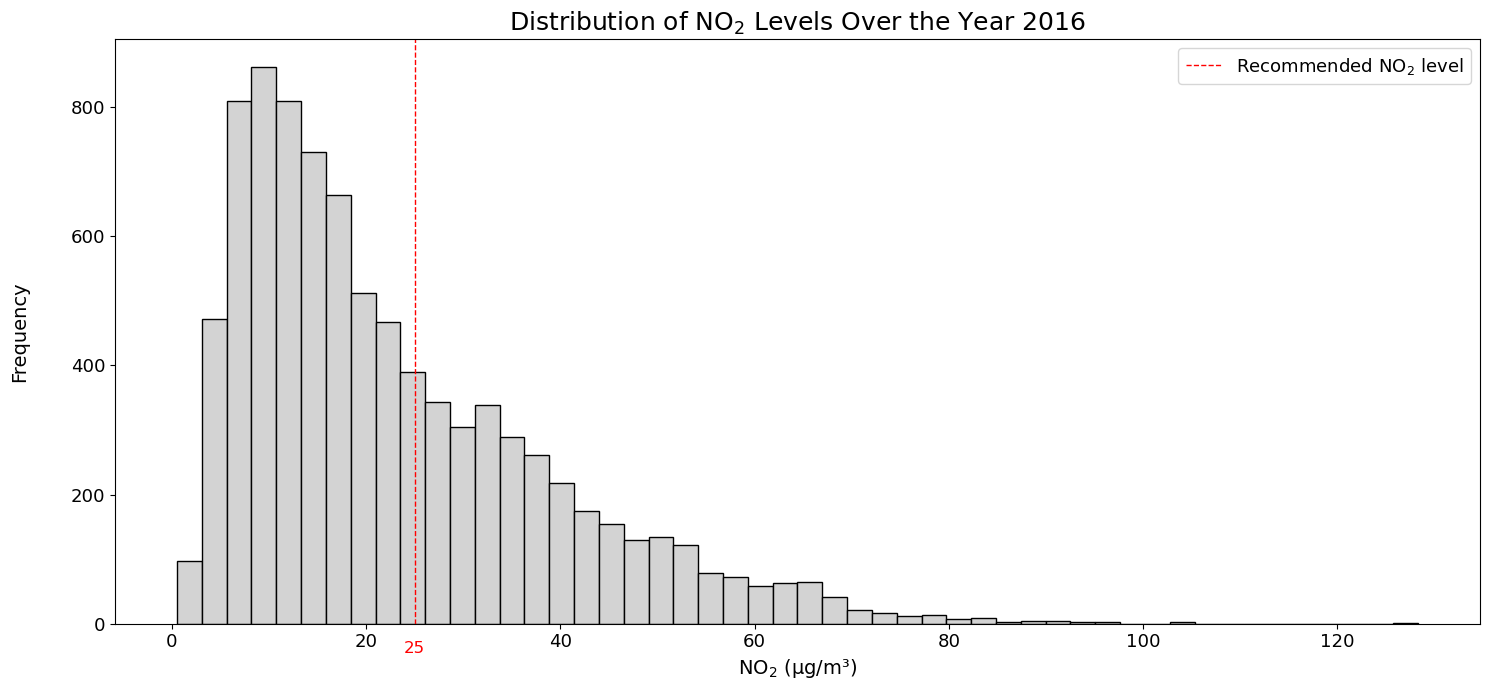

In [68]:
plt.figure(figsize=(15, 7))
plt.hist(one_year_data['NO2'], bins=50, color='lightgray', edgecolor='black')
plt.title('Distribution of NO$_2$ Levels Over the Year 2016', fontsize=18)
plt.xlabel('NO$_2$ (µg/m³)', fontsize=14)
plt.ylabel('Frequency', fontsize=14, labelpad=30)
plt.axvline(x=25, color='red', linestyle='--', linewidth=1, label='Recommended NO$_2$ level')

plt.text(25, -plt.gca().get_ylim()[1] * 0.05, '25', color='red', fontsize=12, ha='center')

ax = plt.gca()
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.legend(loc='upper right', fontsize=13)
plt.tight_layout()
plt.show()

## Correlation matrix

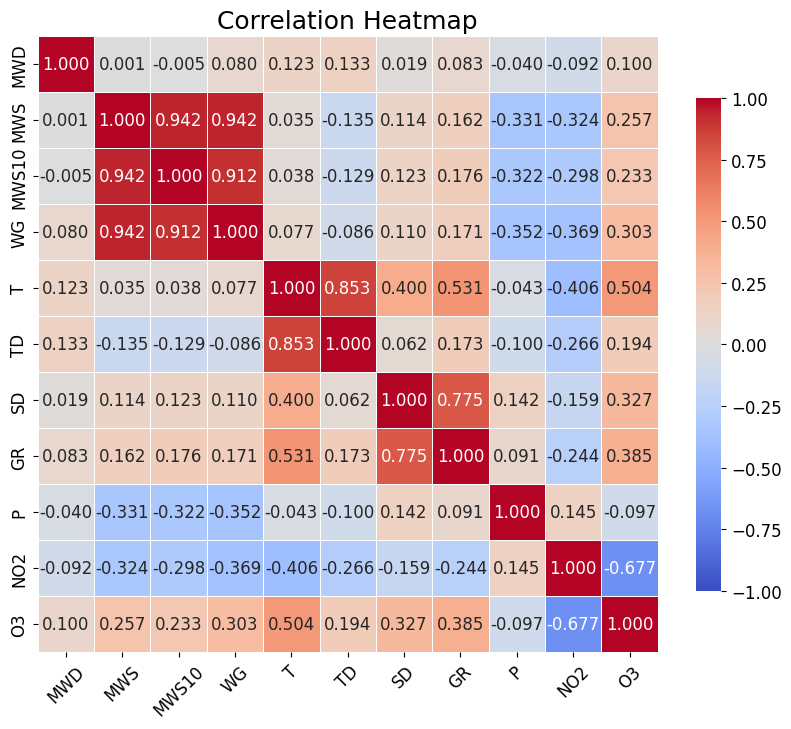

In [46]:
data_no_time = data.drop(['YYYYMMDD', 'HH'], axis=1)

correlation_matrix = data_no_time.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, 
            annot=True,
            annot_kws={"size": 12},
            cmap='coolwarm',
            fmt=".3f",  
            linewidths=0.5,
            vmin=-1, vmax=1,
            cbar_kws={"shrink": .8},
            center=0)

# Increase title font size
plt.title('Correlation Heatmap', fontsize=18)

# Increase x and y tick labels' font size
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=12)  # Set the font size for color bar ticks

plt.show()


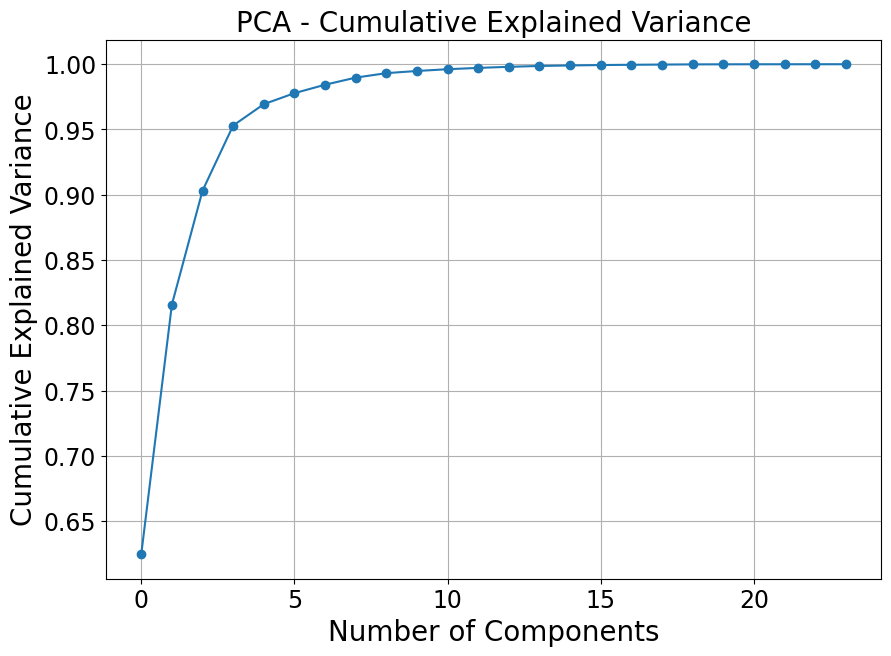

In [37]:
data_pca = pd.read_csv("../data/processed/fe_combined.csv")

pca = PCA()
pca.fit(data_pca)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Cumulative Explained Variance', fontsize=20)
plt.title('PCA - Cumulative Explained Variance', fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.show()